# Evalute Train/Test splits

This notebook evaluates the train/test splits we're using to establish a baseline.

We'd like the train set to have the extreme values, and the test set to have the more common values.

In [74]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
from dotenv import dotenv_values

env = dotenv_values()
comp_data_loc = env.get("COMPOSITION_DATA_PATH")
dataset_loc = env.get("DATA_PATH")

if not comp_data_loc:
    print("Please set COMPOSITION_DATA_PATH in .env file")
    exit(1)

if not dataset_loc:
    print("Please set DATA_PATH in .env file")
    exit(1)

In [76]:
from lib.data_handling import CompositionData


cd = CompositionData(str(comp_data_loc))

In [77]:
from train_test_split import get_all_samples

samples = get_all_samples(cd, str(dataset_loc))

In [78]:
from train_test_split import CalibrationDataFilter, filter_samples


filtered_samples = filter_samples(samples, [])

In [79]:
from train_test_split import create_train_test_split_with_extremes

df = create_train_test_split_with_extremes(filtered_samples)
df

,Target,Spectrum Name,Sample Name,SiO2,TiO2,Al2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,MOC total,Used for 2015 calibration,Used for 2021 Mn calibration,Used for 2022 Li calibration,train_test
0,1421,JSC1421,CA9LVNP1,56.13,0.69,17.69,5.86,0.117,3.85,7.07,3.32,1.44,96.17,1.0,1.0,0.0,train
1,PG7,PG7,Pg7,57.60,0.78,26.60,2.73,0.009,0.70,0.01,0.38,7.10,95.91,1.0,1.0,0.0,train
2,R61,R61,R6-1,64.80,0.78,18.20,5.34,0.031,1.75,0.13,0.78,4.63,96.44,1.0,1.0,0.0,train
3,201424,201424M,201424,77.94,0.31,10.97,2.76,0.020,1.18,1.33,2.95,1.60,99.06,1.0,1.0,0.0,train
4,GL2MT,GL2MT,GL2 7123 SM-75-140,70.73,0.30,14.38,2.38,0.030,1.91,0.63,2.74,3.48,96.58,1.0,1.0,1.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,SanC-I,SanC-I,SanC-I,44.13,1.41,14.65,11.75,0.201,7.79,7.73,4.30,1.28,93.24,1.0,1.0,0.0,test
110,1367,JSC1367,DIHUQ1,54.58,0.01,0.49,2.10,0.188,16.69,25.18,0.17,0.11,99.52,1.0,1.0,0.0,test
325,R2100M,R2100M,R2100,67.82,0.72,15.80,4.22,0.034,2.02,0.36,1.91,3.44,96.32,1.0,1.0,0.0,test
292,NAU-1,NAU-1,NAU-1,40.28,0.02,6.22,27.06,0.012,0.76,1.90,0.16,0.03,76.44,1.0,1.0,0.0,test


In [80]:
df["train_test"].value_counts()

train_test
train    308
test      78
Name: count, dtype: int64

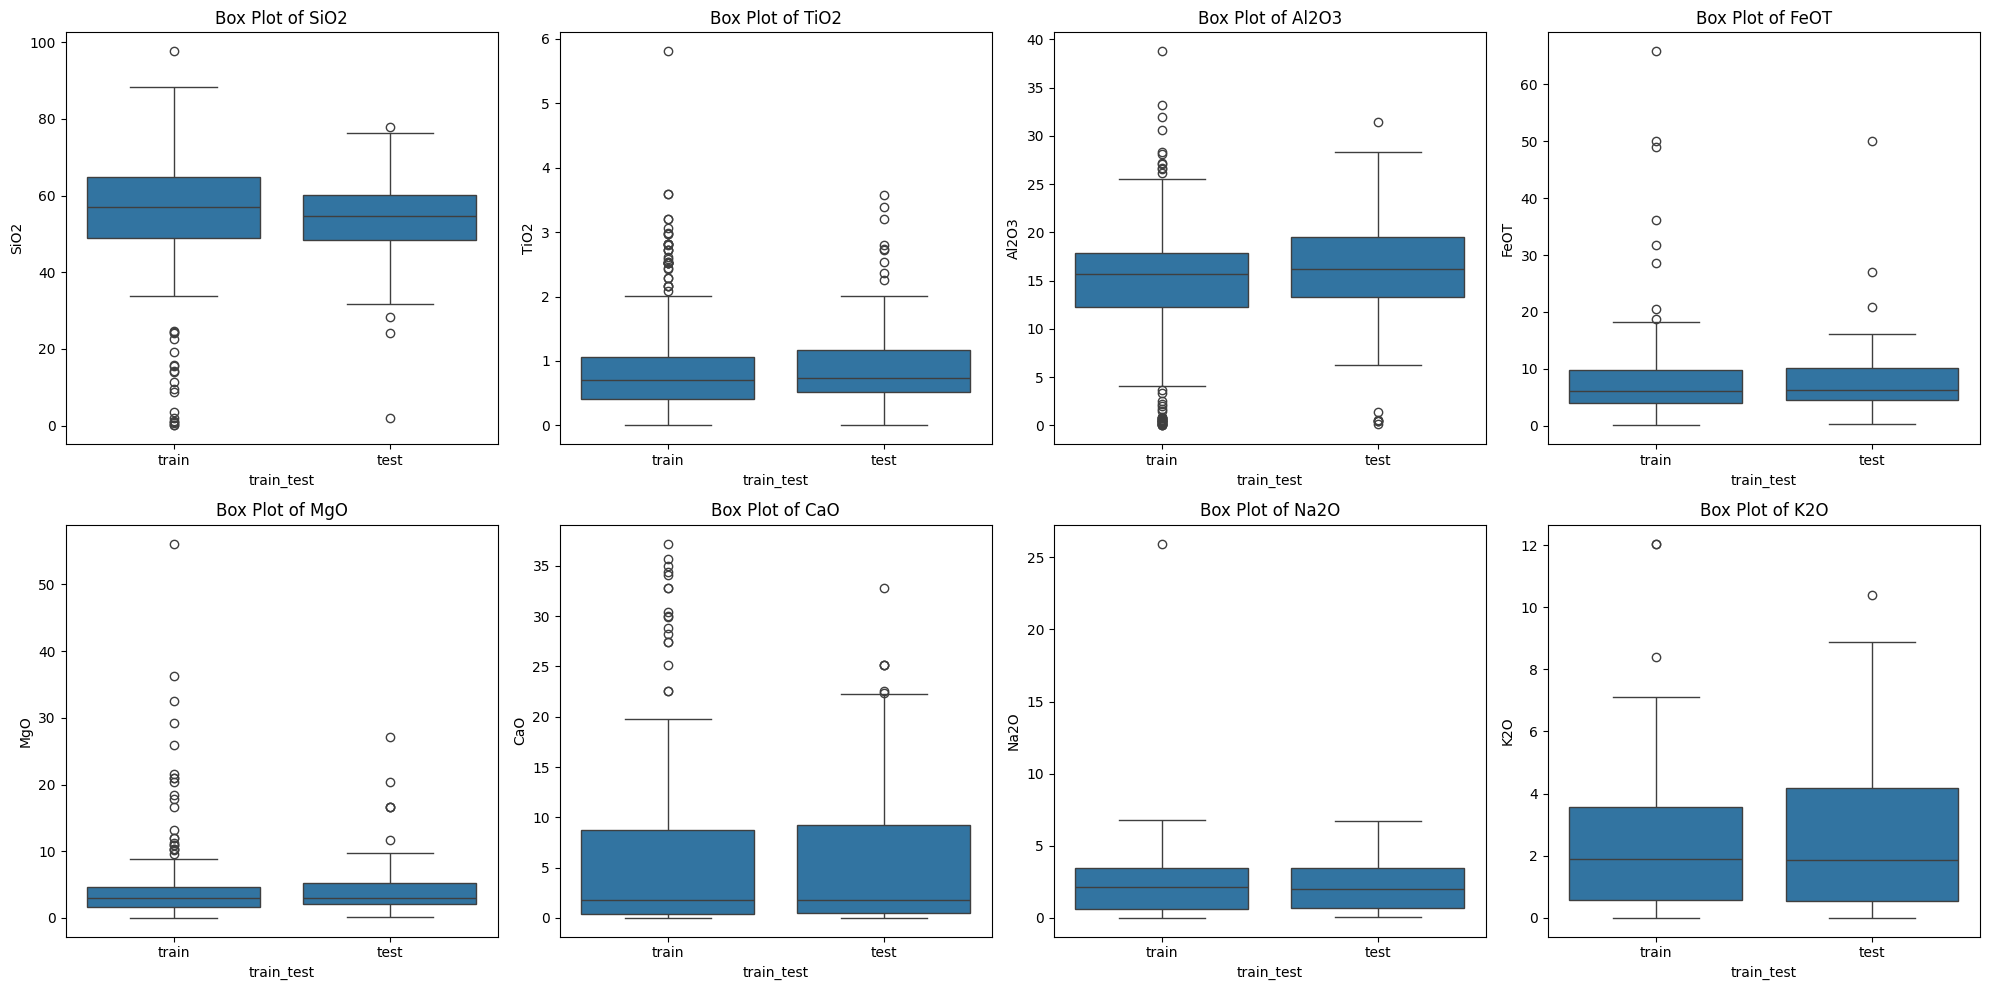

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from lib.reproduction import major_oxides
import warnings

# ignore futurewarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set the size of the plot
plt.figure(figsize=(20, 10))

# Loop through each major oxide and create a subplot
for index, oxide in enumerate(major_oxides, start=1):
    plt.subplot(2, 4, index)  # Adjust the grid dimensions as needed
    sns.boxplot(x='train_test', y=oxide, data=df)
    plt.title(f'Box Plot of {oxide}')

plt.tight_layout()
plt.show()